### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

### Data generation

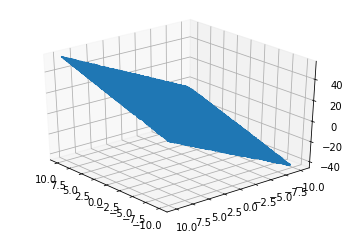

In [2]:
generated_input = np.random.uniform(-10, 10, (10000,2))
generated_output = 2*generated_input[:, 0] + 3*generated_input[:, 1] + 5

# Preview the generated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(generated_input[:,0], generated_input[:,1], generated_output)
ax.view_init(azim=500)

#save the data
np.savez("TF_intro", inputs=generated_input, targets=generated_output)

### Solving with TF

In [3]:
dataset = np.load("TF_intro.npz")

input_dim = 2
output_dim = 1

In [4]:
# Model specification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_dim, input_shape=(input_dim,))
])

# specify model optimizer and loss function
model.compile(optimizer='sgd', loss='mse')

# details of the model
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train the model
model.fit(dataset['inputs'], dataset['targets'], epochs=100, verbose=0)

# verbose
# 0: silent
# 1: show output
# 2: show progress per epoch

In [6]:
# extract the weight and biases
model.layers[0].get_weights() # [0]=>weights [1]=>biases

[array([[2.       ],
        [3.0000002]], dtype=float32), array([4.9999905], dtype=float32)]

### Make predictions

In [7]:
model.predict_on_batch(dataset['inputs']).round(1)

array([[-15.1],
       [ -9.1],
       [  3.1],
       ...,
       [ 23.9],
       [ -6.5],
       [-17.6]], dtype=float32)

In [8]:
dataset['targets'].round(1)

array([-15.1,  -9.1,   3.1, ...,  23.9,  -6.5, -17.6])

### Plotting the data on a 2D plot

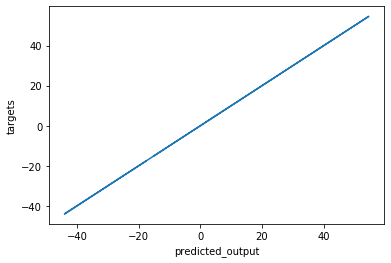

In [9]:
plt.plot(
    np.squeeze(model.predict_on_batch(dataset['inputs'])),
    np.squeeze(dataset['targets'])
)
plt.xlabel('predicted_output')
plt.ylabel('targets')
plt.show()